# Robustness

In [1]:
import sys
import snap
import numpy as np
import tqdm
from random import sample, shuffle
from matplotlib import pyplot as plt
sys.path.append('../src/')
import util
import util_data
reload(util)
reload(util_data)

<module 'util_data' from '../src/util_data.pyc'>

In [22]:
def load_graph(nm):
    if nm =='LS':
        return snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/LS174T_clean_EdgesList.txt", 0, 1)
    elif nm=='SW':
        return snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/SW1222_clean_EdgesList.txt", 0, 1)
    else:
        print('ERROR LOADING')
G_LS174t = load_graph('LS')
G_SW1222 = load_graph('SW')
G_LS174t_nodes = G_LS174t.GetNodes()
G_SW1222_nodes = G_SW1222.GetNodes()

In [3]:
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.TNGraph.New()
    
    # add nodes
    for n in range(N):
        Graph.AddNode(n)
    
    # keep selecting edges randomly
    e = 0
    while e!=E:
        n1,n2 = np.random.choice(range(N), 2, replace=False)
        if not Graph.IsEdge(n1, n2):
            Graph.AddEdge(n1, n2)
            e += 1
    print('Done Erdos Renyi')
    ############################################################################
    return Graph


In [4]:
LS_radii = util_data.loadNodeAttr('../data/og_files/LS174T_spatialGraph_RIN.txt', attr='radius')
LS_pressure = util_data.loadNodeAttr('../data/og_files/LS174T_spatialGraph_RIN.txt', attr='pressure')
LS_flow = util_data.loadNodeAttr('../data/og_files/LS174T_spatialGraph_RIN.txt', attr='flow')

In [5]:
def graph_attack(G, iters=100, del_per_iter=100, order=None):
    reachabilities = []
    if not order:
        order = [x.GetId() for x in G.Nodes()]
        shuffle(order)

    for _ in tqdm.tqdm(range(iters)):        
        for _ in range(del_per_iter):
            G.DelNode(order.pop(0))    
            
        reachabilities.append(snap.GetMxWcc(G).GetNodes())
    return reachabilities

In [6]:
def get_inlet_nodes(G):
    nds = []
    for n in G.Nodes():
        if n.GetInDeg() == 0:
            nds.append(n.GetId())
    return nds

In [7]:
G_SW1222_inlets = get_inlet_nodes(G_SW1222)
G_LS174t_inlets = get_inlet_nodes(G_LS174t)

In [8]:
len(G_LS174t_inlets), len(G_SW1222_inlets)

(1751, 10209)

In [ ]:
r1 = random_attack(G_LS174t, G_LS174t_inlets, iters=150, del_per_iter=100)

In [ ]:
r_sw = random_attack(G_SW1222, G_SW1222_inlets, iters=100, del_per_iter=500)

In [121]:
G_LS174t = load_graph('LS')
LS_nodes = set([x.GetId() for x in G_LS174t.Nodes()])

G_LS174t = load_graph('LS')
press_sorted = [x[0] for x in sorted(LS_pressure.items(), key=lambda x:-x[1]) if x[0] in LS_nodes]
r_LS_presattack = graph_attack(G_LS174t, iters=150, del_per_iter=100, order=press_sorted)

G_LS174t = load_graph('LS')
flow_sorted = [x[0] for x in sorted(LS_flow.items(), key=lambda x:-x[1]) if x[0] in LS_nodes]
r_LS_flowattack = graph_attack(G_LS174t, iters=150, del_per_iter=100, order=flow_sorted)

G_LS174t = load_graph('LS')
radii_sorted = [x[0] for x in sorted(LS_radii.items(), key=lambda x:-x[1]) if x[0] in LS_nodes]
r_LS_radattack = graph_attack(G_LS174t, iters=150, del_per_iter=100, order=radii_sorted)

100%|██████████| 150/150 [00:01<00:00, 83.82it/s] 


In [17]:
G_LS174t = load_graph('LS')
r_LS_rand = graph_attack(G_LS174t, iters=150, del_per_iter=100, order=None)

100%|██████████| 150/150 [00:01<00:00, 85.38it/s] 


In [18]:
G_SW1222 = load_graph('SW')
r_SW_rand = graph_attack(G_SW1222, iters=500, del_per_iter=100, order=None)

100%|██████████| 500/500 [00:32<00:00, 15.38it/s]


In [14]:
G_LS174t = load_graph('LS')
G_ER_LS = genErdosRenyi(G_LS174t.GetNodes(), G_LS174t.GetEdges())

Done Erdos Renyi


In [15]:
attack_ER_rand = graph_attack(G_ER_LS, iters=120, del_per_iter=100, order=None)

100%|██████████| 120/120 [00:01<00:00, 66.91it/s]


In [28]:
G_SW1222 = load_graph('SW')
G_ER_SW = genErdosRenyi(G_SW1222.GetNodes(), G_SW1222.GetEdges())
attack_ER_SW_rand = graph_attack(G_ER_SW, iters=500, del_per_iter=100, order=None)

  0%|          | 0/500 [00:00<?, ?it/s]

Done Erdos Renyi


100%|██████████| 500/500 [00:36<00:00, 13.68it/s]


In [10]:
G_LS174t = load_graph('LS')
betweeness_nodes_LS = snap.TIntFltH()
betweeness_edges_LS = snap.TIntPrFltH()
snap.GetBetweennessCentr(G_LS174t, betweeness_nodes_LS, betweeness_edges_LS, 0.6)

In [9]:
G_SW1222 = load_graph('SW')
betweeness_nodes_SW = snap.TIntFltH()
betweeness_edges_SW = snap.TIntPrFltH()
snap.GetBetweennessCentr(G_SW1222, betweeness_nodes_SW, betweeness_edges_SW, 0.1)

In [11]:
betweeness_nodes_LS = [(x,betweeness_nodes_LS[x]) for x in betweeness_nodes_LS]
betweeness_nodes_SW = [(x,betweeness_nodes_SW[x]) for x in betweeness_nodes_SW]

In [12]:
betweenness_order = [x[0] for x in sorted(betweeness_nodes_LS, key=lambda x:-x[1])]
G_LS174t = load_graph('LS')
r_LS_bet = graph_attack(G_LS174t, iters=150, del_per_iter=100, order=betweenness_order)

100%|██████████| 150/150 [00:01<00:00, 91.15it/s] 


In [13]:
betweenness_order = [x[0] for x in sorted(betweeness_nodes_SW, key=lambda x:-x[1])]
G_SW1222 = load_graph('SW')
r_SW_bet = graph_attack(G_SW1222, iters=500, del_per_iter=100, order=betweenness_order)

100%|██████████| 500/500 [00:26<00:00, 19.12it/s]


In [83]:
from random import shuffle
G_LS174t = load_graph('LS')
G_LS174t_inlets = get_inlet_nodes(G_LS174t)
left = list(set(range(G_LS174t.GetNodes()))-set(G_LS174t_inlets))
shuffle(left)
inlet_order = G_LS174t_inlets + left
shuffle(inlet_order)
r_LS_inletattack = graph_attack(G_LS174t, iters=150, del_per_iter=100, order=inlet_order)

100%|██████████| 150/150 [00:02<00:00, 70.73it/s] 


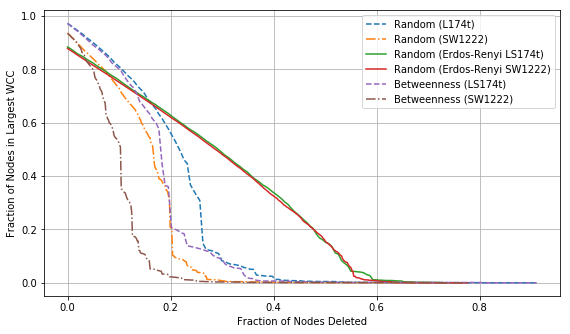

In [46]:
plt.plot([(100*x)/float(G_LS174t_nodes) for x in range(len(r_LS_rand))], 
         [x/float(G_LS174t_nodes) for x in r_LS_rand], label='Random (L174t)', linestyle='--')
plt.plot([(100*x)/float(G_SW1222_nodes) for x in range(len(r_SW_rand))], 
         [x/float(G_SW1222_nodes) for x in r_SW_rand], label='Random (SW1222)', linestyle='-.')
plt.plot([(100*x)/float(G_LS174t_nodes) for x in range(len(attack_ER_rand))], 
         [x/float(G_LS174t_nodes) for x in attack_ER_rand], label='Random (Erdos-Renyi LS174t)')
plt.plot([(100*x)/float(G_SW1222_nodes) for x in range(len(attack_ER_SW_rand))], 
         [x/float(G_SW1222_nodes) for x in attack_ER_SW_rand], label='Random (Erdos-Renyi SW1222)')


#plt.plot([(100*x)/float(G_LS174t_nodes) for x in range(len(r_LS_flowattack))], 
#         [x/float(G_LS174t_nodes) for x in r_LS_flowattack], label='flow attack LS')


plt.plot([(100*x)/float(G_LS174t_nodes) for x in range(len(r_LS_bet))], 
         [x/float(G_LS174t_nodes) for x in r_LS_bet], label='Betweenness (LS174t)', linestyle='--')
plt.plot([(100*x)/float(G_SW1222_nodes) for x in range(len(r_SW_bet))], 
         [x/float(G_SW1222_nodes) for x in r_SW_bet], label='Betweenness (SW1222)', linestyle='-.')

plt.xlabel('Fraction of Nodes Deleted')
plt.ylabel('Fraction of Nodes in Largest WCC')
plt.grid()
#plt.plot([(100*x)/float(G_LS174t_nodes) for x in range(len(r_LS_inletattack))], 
#         [x/float(G_LS174t_nodes) for x in r_LS_inletattack], label='inlet_on_LS')
#

plt.legend()
plt.gcf().set_size_inches(9.25, 5.25)
plt.savefig('../figs/robustness.pdf')